#### Referred : https://medium.com/jatana/unsupervised-text-summarization-using-sentence-embeddings-adb15ce83db1 , https://www.youtube.com/watch?v=MDdeo6_k1x0 , https://www.youtube.com/watch?v=9S0-OC4LFNo


In [1]:
text = "Millions go missing at China bank Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. The pair both worked at Bank of China in the northern city of Harbin, the South China Morning Post reported. The latest scandal at Bank of China will do nothing to reassure foreign investors that China's big four banks are ready for international listings. Government policy sees the bank listings as vital economic reforms. Bank of China is one of two frontrunners in the race to list overseas. The other is China Construction Bank. Both are expected to list abroad during 2005. They shared a $45bn state bailout in 2003, to help clean up their balance sheets in preparation for a foreign stock market debut. However, a report in the China-published Economic Observer said on Monday that the two banks may have scrapped plans to list in New York because of the cost of meeting regulatory requirements imposed since the Enron scandal. Bank of China is the country's biggest foreign exchange dealer, while China Construction Bank is the largest deposit holder. China's banking sector is burdened with at least $190bn of bad debt according to official data, though most observers believe the true figure is far higher. Officially, one in five loans is not being repaid. Attempts to strengthen internal controls and tighten lending policies have uncovered a succession of scandals involving embezzlement by bank officials and loans-for-favours. The most high-profile case involved the ex-president of Bank of China, Wang Xuebing, jailed for 12 years in 2003. Although, he committed the offences whilst running Bank of China in New York, Mr. Wang was head of China Construction Bank when the scandal broke. Earlier this month, a China Construction Bank branch manager was jailed for life in a separate case. China's banks used to act as cash offices for state enterprises and did not require checks on creditworthiness. The introduction of market reforms has been accompanied by attempts to modernize the banking sector, but links between banks and local government remain strong. Last year, China's premier, Wen Jiabao, targeted bank lending practices in a series of speeches, and regulators ordered all big loans to be scrutinized, in an attempt to cool down irresponsible lending. China's leaders see reforming the top four banks as vital to distribute capital to profitable companies and protect the health of China's economic boom. But two problems persist. First, inefficient state enterprises continue to receive protection from bankruptcy because they employ large numbers of people. Second, many questionable loans come not from the big four but from smaller banks. Another high-profile financial firm, China Life, is facing shareholder lawsuits and a probe by the US Securities and Exchange Commission following its 2004 New York listing over its failure to disclose accounting irregularities at its parent company"

In [2]:
words = text.split()
words

['Millions',
 'go',
 'missing',
 'at',
 'China',
 'bank',
 'Two',
 'senior',
 'officials',
 'at',
 'one',
 'of',
 "China's",
 'top',
 'commercial',
 'banks',
 'have',
 'reportedly',
 'disappeared',
 'after',
 'funds',
 'worth',
 'up',
 'to',
 '$120m',
 '(£64m)',
 'went',
 'missing.',
 'The',
 'pair',
 'both',
 'worked',
 'at',
 'Bank',
 'of',
 'China',
 'in',
 'the',
 'northern',
 'city',
 'of',
 'Harbin,',
 'the',
 'South',
 'China',
 'Morning',
 'Post',
 'reported.',
 'The',
 'latest',
 'scandal',
 'at',
 'Bank',
 'of',
 'China',
 'will',
 'do',
 'nothing',
 'to',
 'reassure',
 'foreign',
 'investors',
 'that',
 "China's",
 'big',
 'four',
 'banks',
 'are',
 'ready',
 'for',
 'international',
 'listings.',
 'Government',
 'policy',
 'sees',
 'the',
 'bank',
 'listings',
 'as',
 'vital',
 'economic',
 'reforms.',
 'Bank',
 'of',
 'China',
 'is',
 'one',
 'of',
 'two',
 'frontrunners',
 'in',
 'the',
 'race',
 'to',
 'list',
 'overseas.',
 'The',
 'other',
 'is',
 'China',
 'Constructi

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
stopwords = stopwords.words('english')

for i in words:
    if i in stopwords:
        words.remove(i)


print(words)

['Millions', 'go', 'missing', 'China', 'bank', 'Two', 'senior', 'officials', 'one', "China's", 'top', 'commercial', 'banks', 'reportedly', 'disappeared', 'funds', 'worth', '$120m', '(£64m)', 'went', 'missing.', 'The', 'pair', 'worked', 'Bank', 'China', 'northern', 'city', 'Harbin,', 'South', 'China', 'Morning', 'Post', 'reported.', 'The', 'latest', 'scandal', 'Bank', 'China', 'do', 'nothing', 'reassure', 'foreign', 'investors', "China's", 'big', 'four', 'banks', 'ready', 'international', 'listings.', 'Government', 'policy', 'sees', 'bank', 'listings', 'vital', 'economic', 'reforms.', 'Bank', 'China', 'one', 'two', 'frontrunners', 'race', 'list', 'overseas.', 'The', 'China', 'Construction', 'Bank.', 'Both', 'expected', 'list', 'abroad', '2005.', 'They', 'shared', '$45bn', 'state', 'bailout', '2003,', 'help', 'clean', 'their', 'balance', 'sheets', 'preparation', 'foreign', 'stock', 'market', 'debut.', 'However,', 'report', 'China-published', 'Economic', 'Observer', 'said', 'Monday', 'two

In [5]:
sentences = sent_tokenize(text)
sentences

["Millions go missing at China bank Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing.",
 'The pair both worked at Bank of China in the northern city of Harbin, the South China Morning Post reported.',
 "The latest scandal at Bank of China will do nothing to reassure foreign investors that China's big four banks are ready for international listings.",
 'Government policy sees the bank listings as vital economic reforms.',
 'Bank of China is one of two frontrunners in the race to list overseas.',
 'The other is China Construction Bank.',
 'Both are expected to list abroad during 2005.',
 'They shared a $45bn state bailout in 2003, to help clean up their balance sheets in preparation for a foreign stock market debut.',
 'However, a report in the China-published Economic Observer said on Monday that the two banks may have scrapped plans to list in New York because of the cost of meeting regulatory requ

## Bow

In [6]:
vocab = set()
for i in words:
    if i in vocab:
        continue
    else:
        vocab.add(i)
print(len(vocab), len(sentences))

264 24


In [7]:
vocab = list(sorted(vocab))

In [8]:
vocab

['$120m',
 '$190bn',
 '$45bn',
 '(£64m)',
 '12',
 '2003,',
 '2003.',
 '2004',
 '2005.',
 'Although,',
 'Another',
 'Attempts',
 'Bank',
 'Bank.',
 'Both',
 'But',
 'China',
 "China's",
 'China,',
 'China-published',
 'Commission',
 'Construction',
 'Earlier',
 'Economic',
 'Enron',
 'Exchange',
 'First,',
 'Government',
 'Harbin,',
 'However,',
 'Jiabao,',
 'Last',
 'Life,',
 'Millions',
 'Monday',
 'Morning',
 'Mr.',
 'New',
 'Observer',
 'Officially,',
 'Post',
 'Second,',
 'Securities',
 'South',
 'The',
 'They',
 'Two',
 'US',
 'Wang',
 'Wen',
 'Xuebing,',
 'York',
 'York,',
 'a',
 'abroad',
 'accompanied',
 'according',
 'accounting',
 'act',
 'an',
 'at',
 'attempt',
 'attempts',
 'bad',
 'bailout',
 'balance',
 'bank',
 'banking',
 'bankruptcy',
 'banks',
 'banks.',
 'be',
 'been',
 'believe',
 'big',
 'biggest',
 'boom.',
 'branch',
 'broke.',
 'burdened',
 'capital',
 'case',
 'case.',
 'cash',
 'checks',
 'city',
 'clean',
 'come',
 'commercial',
 'committed',
 'companies',
 

In [9]:
import numpy as np

In [10]:
rows, cols = (len(sentences), len(vocab))
arr = np.zeros((rows, cols))

In [11]:
for index, sentence in enumerate(sentences):
    words = sentence.split()
    for word in words:
        if word in vocab:
            col_index = list(vocab).index(word)
            arr[index][col_index] += 1

In [12]:
arr.shape

(24, 264)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(arr, arr)

In [14]:
cosine_sim.shape

(24, 24)

In [15]:
cosine_sim

array([[1.        , 0.23570226, 0.30123204, 0.06415003, 0.248452  ,
        0.0860663 , 0.07856742, 0.04199605, 0.11475506, 0.1132277 ,
        0.18871284, 0.0727393 , 0.18144368, 0.09072184, 0.14294834,
        0.0496904 , 0.15430335, 0.13245324, 0.17868542, 0.25458754,
        0.        , 0.09622504, 0.        , 0.12326671],
       [0.23570226, 1.        , 0.31950483, 0.13608276, 0.47434165,
        0.27386128, 0.        , 0.        , 0.36514837, 0.48038446,
        0.20016019, 0.        , 0.09622504, 0.38490018, 0.53066863,
        0.15811388, 0.        , 0.23414645, 0.0758098 , 0.23145502,
        0.        , 0.10206207, 0.10540926, 0.16343011],
       [0.30123204, 0.31950483, 1.        , 0.        , 0.28867513,
        0.2       , 0.09128709, 0.09759001, 0.13333333, 0.26311741,
        0.1754116 , 0.        , 0.10540926, 0.21081851, 0.29065918,
        0.11547005, 0.17928429, 0.20519567, 0.2076137 , 0.29580399,
        0.        , 0.1118034 , 0.11547005, 0.10741723],
       [0.064

## Approach 1

In [16]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(arr) 
    wcss.append(kmeans.inertia_)

C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [17]:
import matplotlib.pyplot as plt

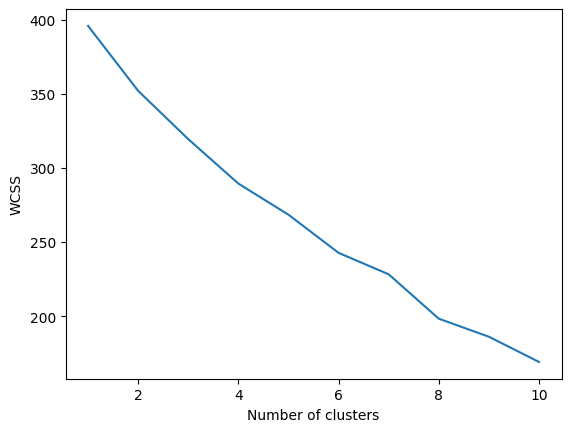

In [18]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
model = kmeans.fit(arr)

C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
model

KMeans(random_state=42)

In [21]:
cluster_assignments = model.labels_
sent = []
result = ""

for cluster_id in range(model.n_clusters):
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]
    random_index = np.random.choice(cluster_indices)
    # print(random_index)
    sent.append(sentences[random_index])
    # print(sent)

result = " ".join(sent)

In [22]:
result

"Another high-profile financial firm, China Life, is facing shareholder lawsuits and a probe by the US Securities and Exchange Commission following its 2004 New York listing over its failure to disclose accounting irregularities at its parent company Earlier this month, a China Construction Bank branch manager was jailed for life in a separate case. However, a report in the China-published Economic Observer said on Monday that the two banks may have scrapped plans to list in New York because of the cost of meeting regulatory requirements imposed since the Enron scandal. Last year, China's premier, Wen Jiabao, targeted bank lending practices in a series of speeches, and regulators ordered all big loans to be scrutinized, in an attempt to cool down irresponsible lending. Although, he committed the offences whilst running Bank of China in New York, Mr. Wang was head of China Construction Bank when the scandal broke. China's leaders see reforming the top four banks as vital to distribute c

## Approach 2

In [23]:
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=42)
model = kmeans.fit(arr)
cluster_assignments = model.labels_
cluster_counts = np.bincount(cluster_assignments)
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} points")

Cluster 0: 1 points
Cluster 1: 3 points
Cluster 2: 8 points
Cluster 3: 1 points
Cluster 4: 1 points
Cluster 5: 1 points
Cluster 6: 1 points
Cluster 7: 1 points
Cluster 8: 1 points
Cluster 9: 1 points
Cluster 10: 1 points
Cluster 11: 1 points
Cluster 12: 1 points
Cluster 13: 1 points
Cluster 14: 1 points


C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
sent = []
result = ""

for cluster_id in range(model.n_clusters):
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]
    random_index = np.random.choice(cluster_indices)
    # print(random_index)
    sent.append(sentences[random_index])
    # print(sent)

result = " ".join(sent)
result

"Earlier this month, a China Construction Bank branch manager was jailed for life in a separate case. The pair both worked at Bank of China in the northern city of Harbin, the South China Morning Post reported. The other is China Construction Bank. China's leaders see reforming the top four banks as vital to distribute capital to profitable companies and protect the health of China's economic boom. Millions go missing at China bank Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. Another high-profile financial firm, China Life, is facing shareholder lawsuits and a probe by the US Securities and Exchange Commission following its 2004 New York listing over its failure to disclose accounting irregularities at its parent company However, a report in the China-published Economic Observer said on Monday that the two banks may have scrapped plans to list in New York because of the cost of meeting regulat

## Tfidf

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
feature_names = tfidf_vectorizer.get_feature_names_out()
dense_tfidf_matrix = tfidf_matrix.toarray()
import pandas as pd
df_tfidf = pd.DataFrame(dense_tfidf_matrix, columns=feature_names)

print(df_tfidf)

          12      120m    190bn      2003      2004      2005      45bn  \
0   0.000000  0.205358  0.00000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.00000  0.000000  0.000000  0.395423  0.000000   
7   0.000000  0.000000  0.00000  0.213363  0.000000  0.000000  0.241089   
8   0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.21716  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
12  0.000000  0.000000  0

In [27]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
model = kmeans.fit(df_tfidf)
cluster_assignments = model.labels_
cluster_counts = np.bincount(cluster_assignments)
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} points")

Cluster 0: 2 points
Cluster 1: 4 points
Cluster 2: 3 points
Cluster 3: 2 points
Cluster 4: 3 points
Cluster 5: 6 points
Cluster 6: 3 points
Cluster 7: 1 points


C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
sent = []
result = ""

for cluster_id in range(model.n_clusters):
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]
    random_index = np.random.choice(cluster_indices)
    # print(random_index)
    sent.append(sentences[random_index])
    # print(sent)

result = " ".join(sent)
result

"Earlier this month, a China Construction Bank branch manager was jailed for life in a separate case. Millions go missing at China bank Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. Attempts to strengthen internal controls and tighten lending policies have uncovered a succession of scandals involving embezzlement by bank officials and loans-for-favours. Officially, one in five loans is not being repaid. China's banks used to act as cash offices for state enterprises and did not require checks on creditworthiness. Bank of China is one of two frontrunners in the race to list overseas. China's leaders see reforming the top four banks as vital to distribute capital to profitable companies and protect the health of China's economic boom. But two problems persist."

## Cbow, Sgram, Word2Vec

In [29]:
from gensim.models import Word2Vec

In [30]:
list_sent = []
for i in sentences:
    list_sent.append(list(word_tokenize(i)))
list_sent

[['Millions',
  'go',
  'missing',
  'at',
  'China',
  'bank',
  'Two',
  'senior',
  'officials',
  'at',
  'one',
  'of',
  'China',
  "'s",
  'top',
  'commercial',
  'banks',
  'have',
  'reportedly',
  'disappeared',
  'after',
  'funds',
  'worth',
  'up',
  'to',
  '$',
  '120m',
  '(',
  '£64m',
  ')',
  'went',
  'missing',
  '.'],
 ['The',
  'pair',
  'both',
  'worked',
  'at',
  'Bank',
  'of',
  'China',
  'in',
  'the',
  'northern',
  'city',
  'of',
  'Harbin',
  ',',
  'the',
  'South',
  'China',
  'Morning',
  'Post',
  'reported',
  '.'],
 ['The',
  'latest',
  'scandal',
  'at',
  'Bank',
  'of',
  'China',
  'will',
  'do',
  'nothing',
  'to',
  'reassure',
  'foreign',
  'investors',
  'that',
  'China',
  "'s",
  'big',
  'four',
  'banks',
  'are',
  'ready',
  'for',
  'international',
  'listings',
  '.'],
 ['Government',
  'policy',
  'sees',
  'the',
  'bank',
  'listings',
  'as',
  'vital',
  'economic',
  'reforms',
  '.'],
 ['Bank',
  'of',
  'China',

In [31]:
len(list_sent)

24

In [32]:
cbow_model = Word2Vec(sentences=list_sent, vector_size=100, window=5, sg=0, min_count=1, workers=4, epochs = 5)
skip_gram_model = Word2Vec(sentences=list_sent, vector_size=100, window=5, sg=1, min_count=1, workers=4, epochs = 5)

word_vectors_cbow = cbow_model.wv
word_vectors_skipgram = skip_gram_model.wv

In [33]:
vectors = [word_vectors_cbow[word] for word in word_vectors_cbow.index_to_key]
vectors_array = np.array(vectors)
vectors_array.shape

(287, 100)

In [34]:
arr = np.zeros((24, 100))

In [35]:
sent_vectors = []
for index, i in enumerate(list_sent):
    vect = np.zeros(100)
    for index2, j in enumerate(i):
        vect += word_vectors_cbow[j]
    arr[index] = vect

In [36]:
arr

array([[-0.04910882,  0.02631388,  0.00692683, ...,  0.00230848,
        -0.00258475, -0.00641026],
       [-0.0051739 ,  0.04175982, -0.0062662 , ...,  0.00978397,
         0.0221356 ,  0.02466823],
       [-0.01908725,  0.03591572, -0.03197787, ...,  0.0046736 ,
         0.0291421 , -0.01554941],
       ...,
       [-0.05442569, -0.00479675,  0.02630307, ...,  0.00944392,
         0.00873892, -0.04787242],
       [-0.00398558, -0.02429274,  0.01857925, ..., -0.02913957,
        -0.00938203,  0.01384473],
       [-0.02367005, -0.02511309, -0.01857898, ..., -0.03041917,
         0.00383276, -0.06568234]])

In [37]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
model = kmeans.fit(arr)
cluster_assignments = model.labels_
cluster_counts = np.bincount(cluster_assignments)
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} points")

Cluster 0: 3 points
Cluster 1: 10 points
Cluster 2: 3 points
Cluster 3: 1 points
Cluster 4: 1 points
Cluster 5: 4 points
Cluster 6: 1 points
Cluster 7: 1 points


C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
sent = []
result = ""

for cluster_id in range(model.n_clusters):
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]
    random_index = np.random.choice(cluster_indices)
    # print(random_index)
    sent.append(sentences[random_index])
    # print(sent)

result = " ".join(sent)
result

"The most high-profile case involved the ex-president of Bank of China, Wang Xuebing, jailed for 12 years in 2003. They shared a $45bn state bailout in 2003, to help clean up their balance sheets in preparation for a foreign stock market debut. The latest scandal at Bank of China will do nothing to reassure foreign investors that China's big four banks are ready for international listings. Another high-profile financial firm, China Life, is facing shareholder lawsuits and a probe by the US Securities and Exchange Commission following its 2004 New York listing over its failure to disclose accounting irregularities at its parent company Last year, China's premier, Wen Jiabao, targeted bank lending practices in a series of speeches, and regulators ordered all big loans to be scrutinized, in an attempt to cool down irresponsible lending. China's banks used to act as cash offices for state enterprises and did not require checks on creditworthiness. However, a report in the China-published E

In [39]:
sent_vectors = []
for index, i in enumerate(list_sent):
    vect = np.zeros(100)
    for index2, j in enumerate(i):
        vect += word_vectors_skipgram[j]
    arr[index] = vect

In [40]:
arr

array([[-5.35645652e-02,  3.95659305e-02,  1.58365028e-02, ...,
        -5.44045868e-03, -8.46588518e-05, -2.59317689e-02],
       [-7.69038525e-03,  5.40629398e-02,  1.92878471e-03, ...,
         2.46360028e-03,  2.52203791e-02,  9.64935287e-03],
       [-2.25692786e-02,  4.82578336e-02, -2.45671927e-02, ...,
        -2.33338944e-03,  3.23945234e-02, -3.14254624e-02],
       ...,
       [-5.74378221e-02,  4.76629558e-03,  3.34858223e-02, ...,
         4.29916083e-03,  1.19802964e-02, -6.12144736e-02],
       [-6.40014117e-03, -1.51006372e-02,  2.49993919e-02, ...,
        -3.45378983e-02, -6.25404305e-03,  1.21315569e-03],
       [-2.83973514e-02, -1.77286908e-03, -3.47859909e-03, ...,
        -4.45458105e-02,  9.62799949e-03, -1.00375094e-01]])

In [41]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
model = kmeans.fit(arr)
cluster_assignments = model.labels_
cluster_counts = np.bincount(cluster_assignments)
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} points")

Cluster 0: 1 points
Cluster 1: 6 points
Cluster 2: 11 points
Cluster 3: 1 points
Cluster 4: 1 points
Cluster 5: 2 points
Cluster 6: 1 points
Cluster 7: 1 points


C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
sent = []
result = ""

for cluster_id in range(model.n_clusters):
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]
    random_index = np.random.choice(cluster_indices)
    # print(random_index)
    sent.append(sentences[random_index])
    # print(sent)

result = " ".join(sent)
result

"Millions go missing at China bank Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. The most high-profile case involved the ex-president of Bank of China, Wang Xuebing, jailed for 12 years in 2003. They shared a $45bn state bailout in 2003, to help clean up their balance sheets in preparation for a foreign stock market debut. Another high-profile financial firm, China Life, is facing shareholder lawsuits and a probe by the US Securities and Exchange Commission following its 2004 New York listing over its failure to disclose accounting irregularities at its parent company Last year, China's premier, Wen Jiabao, targeted bank lending practices in a series of speeches, and regulators ordered all big loans to be scrutinized, in an attempt to cool down irresponsible lending. China's banking sector is burdened with at least $190bn of bad debt according to official data, though most observers believe the

## GloVe

In [57]:
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-100")

In [63]:
arr = np.zeros((24, 100))

for index, i in enumerate(list_sent):
    try:
        vect = np.zeros(100)
        for index2, j in enumerate(i):
            j = j.lower()
            vect += glove_model[j]
        arr[index] = vect
    except:
        arr[index] = 0

In [64]:
arr

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -1.00783401,  -2.02389206,   9.84201201, ...,  -4.99838601,
         14.86538   ,   1.10867696],
       [  0.60483997,   3.49782792,  11.77713617, ...,  -8.91049395,
         14.41900004,   6.71538302],
       ...,
       [ -0.88528148,   4.03943403,   3.55119606, ...,  -4.69245804,
         10.57878311,  -2.886932  ],
       [  0.42773398,   4.4828019 ,   6.00865597, ...,  -1.64742303,
         10.16510715,  -0.89470897],
       [  4.93542403,  -0.28085491,  10.50614293, ..., -11.14424284,
         24.53128587,   2.79986996]])

In [65]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
model = kmeans.fit(arr)
cluster_assignments = model.labels_
cluster_counts = np.bincount(cluster_assignments)
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} points")

Cluster 0: 5 points
Cluster 1: 3 points
Cluster 2: 4 points
Cluster 3: 1 points
Cluster 4: 5 points
Cluster 5: 4 points
Cluster 6: 1 points
Cluster 7: 1 points


C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [66]:
sent = []
result = ""

for cluster_id in range(model.n_clusters):
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]
    random_index = np.random.choice(cluster_indices)
    # print(random_index)
    sent.append(sentences[random_index])
    # print(sent)

result = " ".join(sent)
result

"However, a report in the China-published Economic Observer said on Monday that the two banks may have scrapped plans to list in New York because of the cost of meeting regulatory requirements imposed since the Enron scandal. The latest scandal at Bank of China will do nothing to reassure foreign investors that China's big four banks are ready for international listings. First, inefficient state enterprises continue to receive protection from bankruptcy because they employ large numbers of people. Another high-profile financial firm, China Life, is facing shareholder lawsuits and a probe by the US Securities and Exchange Commission following its 2004 New York listing over its failure to disclose accounting irregularities at its parent company Officially, one in five loans is not being repaid. The pair both worked at Bank of China in the northern city of Harbin, the South China Morning Post reported. Although, he committed the offences whilst running Bank of China in New York, Mr. Wang 

## FastText

In [75]:
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

In [81]:
len( fasttext_model["king"])

300

In [86]:
arr = np.zeros((24, 300))

for index, i in enumerate(list_sent):
    try:
        vect = np.zeros(300)
        for index2, j in enumerate(i):
            j = j.lower()
            vect += fasttext_model[j]
        arr[index] = vect
    except:
        arr[index] = 0

In [87]:
arr

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0808474 , -0.39361607,  0.15241509, ..., -0.17159451,
        -0.40947499, -0.3302204 ],
       ...,
       [ 0.27881574,  0.0577866 ,  0.2924283 , ..., -0.1417488 ,
        -0.3343176 ,  0.0896351 ],
       [ 0.2288393 ,  0.0744827 ,  0.0220567 , ..., -0.37280763,
        -0.1302728 , -0.2399033 ],
       [ 0.36202162, -0.84973033,  0.7142244 , ...,  0.16958502,
        -0.2652065 ,  0.0061532 ]])

In [88]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
model = kmeans.fit(arr)
cluster_assignments = model.labels_
cluster_counts = np.bincount(cluster_assignments)
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} points")

Cluster 0: 7 points
Cluster 1: 2 points
Cluster 2: 2 points
Cluster 3: 1 points
Cluster 4: 4 points
Cluster 5: 1 points
Cluster 6: 4 points
Cluster 7: 3 points


C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karu0\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [89]:
sent = []
result = ""

for cluster_id in range(model.n_clusters):
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]
    random_index = np.random.choice(cluster_indices)
    # print(random_index)
    sent.append(sentences[random_index])
    # print(sent)

result = " ".join(sent)
result

"Millions go missing at China bank Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. Bank of China is the country's biggest foreign exchange dealer, while China Construction Bank is the largest deposit holder. The introduction of market reforms has been accompanied by attempts to modernize the banking sector, but links between banks and local government remain strong. Another high-profile financial firm, China Life, is facing shareholder lawsuits and a probe by the US Securities and Exchange Commission following its 2004 New York listing over its failure to disclose accounting irregularities at its parent company First, inefficient state enterprises continue to receive protection from bankruptcy because they employ large numbers of people. They shared a $45bn state bailout in 2003, to help clean up their balance sheets in preparation for a foreign stock market debut. Both are expected to list abroa